# <center>Forecasting income per person</center>
## <center>EDA and Training Model</center>
## Authors:
### >>> Alex Samoylenko
### >>> Vladyslav Honcharuk
### >>> Ostap Kalapun'
### >>> Maksym Chernykh

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

In [49]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-ds/TEST TASK (dataset).csv


In [50]:
# in case of removing errors
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats

In [51]:
df = pd.read_csv('../input/game-ds/TEST TASK (dataset).csv')

In [52]:
df.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sessions_day0,1466467.0,1.847298,2.530825,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day1,1466465.0,2.193912,3.621980,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day3,1466464.0,2.608979,5.347342,0.000000,1.0,1.0,2.0,771.000000
total_sessions_day7,1466458.0,3.113484,7.888102,0.000000,1.0,1.0,2.0,905.000000
chapters_finished_day0,1467832.0,1.234763,3.048333,0.000000,0.0,0.0,1.0,73.000000
...,...,...,...,...,...,...,...,...
ad_ltv_day3,1467832.0,0.013254,0.074721,0.000000,0.0,0.0,0.0,19.970615
target_sub_ltv_day30,1467832.0,0.022030,0.308876,-2.829604,0.0,0.0,0.0,45.457412
target_iap_ltv_day30,1467832.0,0.213927,2.097916,0.000000,0.0,0.0,0.0,268.787759
target_ad_ltv_day30,1467832.0,0.020916,0.160193,0.000000,0.0,0.0,0.0,33.930838


[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting.



Include a description of the results displayed by each *plot*.

Text(0.5, 1.0, 'Distribution of target_full_ltv_day30')

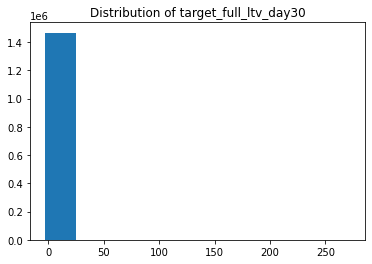

In [55]:
plt.hist(df["target_full_ltv_day30"])
plt.title("Distribution of target_full_ltv_day30")

In [56]:
pd.set_option('display.max_rows', 20)

In [57]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape[0])

Number of duplicate rows :  840221


[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


#### Duplicate rows

In [58]:
duplicate_rows = df[df.duplicated()]
print("Number of all rows: ", df.shape[0])
print("Number of duplicate rows : ", duplicate_rows.shape[0])
print("Number of non-duplicate rows: ", df.shape[0] - duplicate_rows.shape[0])

Number of all rows:  1467832
Number of duplicate rows :  840221
Number of non-duplicate rows:  627611


#### Missing values

In [59]:
missing_values = df.isna().sum()[df.isna().sum() > 0]
print(f"Number of missing values: {missing_values}")

Number of missing values: total_sessions_day0    1365
total_sessions_day1    1367
total_sessions_day3    1368
total_sessions_day7    1374
dtype: int64


In [60]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Data Split

In [61]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size=0.3)

train.to_csv("train.csv")
test.to_csv("test.csv")

#### Categorical data prep

In [62]:
from sklearn.preprocessing import OneHotEncoder
# checking features
categorical = df.select_dtypes(include='O').keys()
# display variabels
categorical

Index(['media_source', 'install_date', 'country_code', 'platform'], dtype='object')

In [63]:
df.drop(['install_date', 'media_source', 'country_code'], axis=1, inplace=True)

### Scaling

#### Normalization

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

def scale_data(X_train, X_valid, scaler):
    cols = X_train.columns
    cols_norm = cols[cols!=('ios' or 'android')]
    if scaler=='normal':
        scaler = Normalizer()
    elif scaler=='standard':
        scaler = StandardScaler()
    elif scaler=='minmax':
        scaler = MinMaxScaler()
    X_train_scaled = X_train.copy()
    X_valid_scaled = X_valid.copy()
    X_train_scaled[cols_norm] = scaler.fit_transform(X_train_scaled[cols_norm])
    X_valid_scaled[cols_norm] = scaler.transform(X_valid_scaled[cols_norm])
    return X_train_scaled, X_valid_scaled

In [65]:
X_train_d_norm, X_valid_d_norm = scale_data(X_train_d, X_valid_d, 'normal')
X_train_d_std, X_valid_d_std = scale_data(X_train_d, X_valid_d, 'standard')
X_train_d_mm, X_valid_d_mm = scale_data(X_train_d, X_valid_d, 'minmax')

NameError: name 'X_train_d' is not defined

In [ ]:
df

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.


[Back to top](#Index)

## 3. Project Description

Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


[Back to top](#Index)

### 3.1 Algorithm

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about it
Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_train_d_categ= lab.fit_transform(y_train_d)
y_valid_d_categ = lab.fit_transform(y_valid_d)

In [ ]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X, y)

In [ ]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation


In [ ]:
ridge = Ridge().fit(X_train_d, y_train_d)
predicted = ridge.predict(X_valid_d)
print("Test RMSE: ", np.sqrt(mean_squared_error(y_valid_d, predicted)))
print("Test R^2: ", r2_score(y_valid_d, predicted))

In [ ]:
def try_model_plain(model, preprocessor, X_train, X_valid, y_train, y_valid):
    if preprocessor!=None:
        X_train_imputed = preprocessor.fit_transform(X_train)
        X_valid_imputed = preprocessor.transform(X_valid)
        model.fit(X_train_imputed, y_train)
        predictions = model.predict(X_valid_imputed)
        score = r2_score(y_valid, predictions)
    elif preprocessor==None:
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)
        score = r2_score(y_valid, predictions)
    return score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

In [ ]:
print("Drop rows: ",
      try_model_plain(model, None, X_train_d, X_valid_d, y_train_d, y_valid_d))
print("Zero-constant univariate imputer: ",
      try_model_plain(model, num_transformer_zero, X_train_imp, X_valid_imp, y_train_imp, y_valid_imp))
print("Mean univariate imputer: ",
      try_model_plain(model, num_transformer_mean, X_train_imp, X_valid_imp, y_train_imp, y_valid_imp))
print("Iterative multivariate imputer: ",
      try_model_plain(model, num_transformer_iter, X_train_imp, X_valid_imp, y_train_imp, y_valid_imp))

In [ ]:
print('Without scaling: ', try_model_plain(model, None, X_train_d, X_valid_d, y_train_d, y_valid_d))
print('Normal scaling: ', try_model_plain(model, None, X_train_d_norm, X_valid_d_norm, y_train_d, y_valid_d))
print('Standard scaling: ', try_model_plain(model, None, X_train_d_std, X_valid_d_std, y_train_d, y_valid_d))
print('MinMax scaling: ', try_model_plain(model, None, X_train_d_mm, X_valid_d_mm, y_train_d, y_valid_d))

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



[Back to top](#Index)

### 3.2 Analysis 


Try to improve the results of your model analysis by including a different number of variables in your code for algorithm. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?




[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .
